<a href="https://colab.research.google.com/github/ShailShikhar/movie-review/blob/main/Movie_Sentiment_Classification_Na%C3%AFve_Bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

In [2]:
train_ds = pd.read_csv("sample_data/sentiment_train", delimiter="\t")
train_ds.head(10)

,sentiment,text
0,1,The Da Vinci Code book is just awesome.
1,1,this was the first clive cussler i've ever rea...
2,1,i liked the Da Vinci Code a lot.
3,1,i liked the Da Vinci Code a lot.
4,1,I liked the Da Vinci Code but it ultimatly did...
5,1,that's not even an exaggeration ) and at midni...
6,1,"I loved the Da Vinci Code, but now I want some..."
7,1,"i thought da vinci code was great, same with k..."
8,1,The Da Vinci Code is actually a good movie...
9,1,I thought the Da Vinci Code was a pretty good ...


In [3]:
train_ds.shape

(6918, 2)

In [4]:
train_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6918 entries, 0 to 6917
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  6918 non-null   int64 
 1   text       6918 non-null   object
dtypes: int64(1), object(1)
memory usage: 108.2+ KB


In [5]:
train_ds.describe(include=['object','int64'])

,sentiment,text
count,6918.000000,6918
unique,NaN,1291
top,NaN,I love Harry Potter.
freq,NaN,167
mean,0.569962,NaN
std,0.495117,NaN
min,0.000000,NaN
25%,0.000000,NaN
50%,1.000000,NaN
75%,1.000000,NaN


In [6]:
pd.set_option('max_colwidth', 800)
train_ds[train_ds.sentiment == 1][:5]

,sentiment,text
0,1,The Da Vinci Code book is just awesome.
1,1,"this was the first clive cussler i've ever read, but even books like Relic, and Da Vinci code were more plausible than this."
2,1,i liked the Da Vinci Code a lot.
3,1,i liked the Da Vinci Code a lot.
4,1,I liked the Da Vinci Code but it ultimatly didn't seem to hold it's own.


In [7]:
train_ds[train_ds.sentiment == 0][:5]

,sentiment,text
3943,0,da vinci code was a terrible movie.
3944,0,"Then again, the Da Vinci code is super shitty movie, and it made like 700 million."
3945,0,"The Da Vinci Code comes out tomorrow, which sucks."
3946,0,i thought the da vinci code movie was really boring.
3947,0,"God, Yahoo Games has this truly-awful looking Da Vinci Code-themed skin on it's chessboard right now."


In [8]:
sen_df = train_ds['sentiment'].value_counts().reset_index()
sen_df['% of reviews'] = sen_df['sentiment'].map(lambda x : (x/sen_df['sentiment'].sum())*100)
sen_df

,sentiment,count,% of reviews
0,1,3943,100.0
1,0,2975,0.0


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

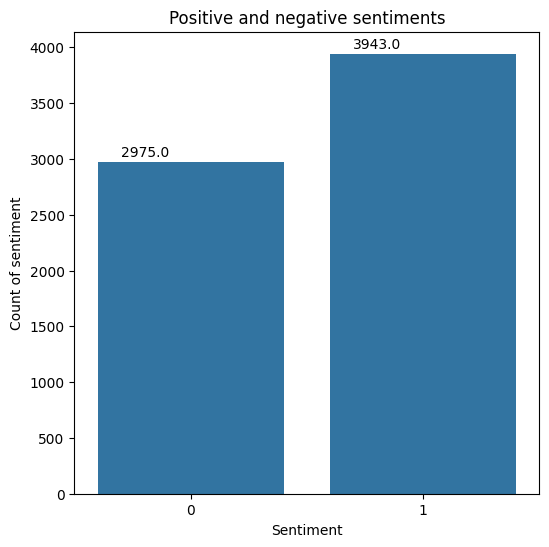

In [10]:
plt.figure(figsize=(6,6))
ax = sns.countplot(x='sentiment', data=train_ds)
for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x()+0.1, p.get_height() + 50))
plt.title("Positive and negative sentiments")
plt.xlabel("Sentiment")
plt.ylabel("Count of sentiment")
plt.show()

In [11]:
from wordcloud import WordCloud, STOPWORDS
%matplotlib inline

# Text processing and model building libraries
import random
import re
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction import text
from nltk.stem.snowball import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix

# Models
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB

In [12]:
# Initialize the count vectorizer
count_vectorizer = CountVectorizer()
# Create the dictionary from the corpus
feature_vector = count_vectorizer.fit(train_ds.text)
# get the feature names
features0 = count_vectorizer.get_feature_names_out()
print("Total number of features: ", len(features0))
print("-----------------------------------------")
# name of the each features
print(feature_vector.get_feature_names_out())
print("-----------------------------------------")
# random feature names
print(random.sample(list(features0), 10))

Total number of features:  2132
-----------------------------------------
['00' '007' '10' ... 'zach' 'zen' 'µª']
-----------------------------------------
['boycotted', 'table', 'val', 'gyllenhaal', 'colfer', 'idea', 'stites', 'abortion', 'spy', 'lama']


In [13]:
train_ds_features = count_vectorizer.transform(train_ds.text)
print(type(train_ds_features))
print("-----------------------------------------")
# shape of transoformed array
print(train_ds_features.shape)
print("-----------------------------------------")
# how sparse is this out matrix, find the non-zero values in matrix
print("Non-zero values in our matrix:", train_ds_features.getnnz())
print("-----------------------------------------")
# percentage of total values set as a zeros
print("Density of the matrix: ", train_ds_features.getnnz()*100/(train_ds_features.shape[0]*train_ds_features.shape[1]))

<class 'scipy.sparse._csr.csr_matrix'>
-----------------------------------------
(6918, 2132)
-----------------------------------------
Non-zero values in our matrix: 65398
-----------------------------------------
Density of the matrix:  0.4434010415225908


In [14]:
train_ds_df = pd.DataFrame(train_ds_features.todense())
train_ds_df.columns = features0
# let's croos-check with original dataframe with our vectorised dataframe
train_ds[0:1]

,sentiment,text
0,1,The Da Vinci Code book is just awesome.


In [15]:
train_ds_df.iloc[:1, 150:157]

,away,awesome,awesomely,awesomeness,awesomest,awful,awkward
0,0,1,0,0,0,0,0


In [16]:
train_ds_df[['the','da','vinci','code','book','is','just','awesome','something']][:1]

,the,da,vinci,code,book,is,just,awesome,something
0,1,1,1,1,1,1,1,1,0


In [17]:
feature_counts = train_ds_df.sum().reset_index().sort_values(by=0, ascending=False)
feature_counts.columns = ['Features', 'Counts']
feature_counts.head(10)

,Features,Counts
1864,the,3306
93,and,2154
864,harry,2093
1466,potter,2093
355,code,2002
2009,vinci,2001
442,da,2001
1272,mountain,2000
259,brokeback,2000
1171,love,1624


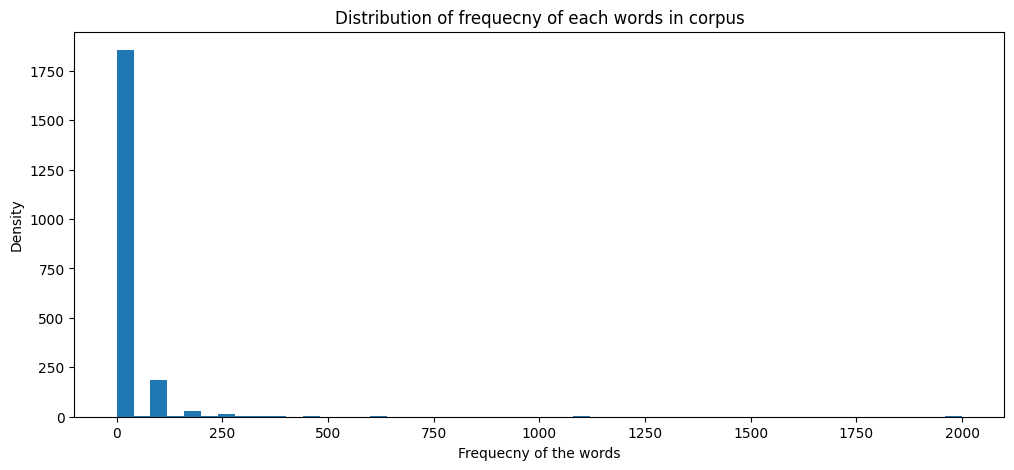

In [18]:
plt.figure(figsize=(12,5))
plt.hist(feature_counts.Counts, bins=50, range= (0,2000))
plt.xlabel("Frequecny of the words")
plt.ylabel("Density")
plt.title("Distribution of frequecny of each words in corpus")
plt.show()

In [19]:
len(feature_counts[feature_counts.Counts == 1])

1228

In [20]:
my_stop_words = text.ENGLISH_STOP_WORDS.union(['harry','potter','code','vinci','da','harry','mountain',
                                              'movie','movies'])
my_stop_words1 = list(my_stop_words)

In [21]:
count_vectorizer1 = CountVectorizer(stop_words = my_stop_words1,
                                   max_features = 1000)    #keeping only 1000 top words
feature_vector1 = count_vectorizer1.fit(train_ds.text)
train_ds_features1 = count_vectorizer1.transform(train_ds.text)
features = feature_vector1.get_feature_names_out()
features_counts1 = np.sum(train_ds_features1.toarray(), axis=0)
feature_counts1 = pd.DataFrame(dict(features = features,
                                    counts = features_counts1))
feature_counts1.sort_values('counts', ascending=False)[:15]

,features,counts
73,brokeback,2000
408,love,1624
39,awesome,1127
436,mission,1094
341,impossible,1093
390,like,974
745,sucks,602
743,sucked,600
297,hate,578
652,really,374


In [22]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [23]:
print("Original:")
print(train_ds.text[1])
print()

sentence = []
for word in train_ds.text[1].split():
    stemmer = PorterStemmer()
    sentence.append(stemmer.stem(word))
print("Stemming:")
print(' '.join(sentence))
print()

sentence = []
for word in train_ds.text[1].split():
    lemmatizer = WordNetLemmatizer()
    sentence.append(lemmatizer.lemmatize(word))
print("Lemmatizing")
print(' '.join(sentence))
print()

Original:
this was the first clive cussler i've ever read, but even books like Relic, and Da Vinci code were more plausible than this.

Stemming:
thi wa the first clive cussler i'v ever read, but even book like relic, and da vinci code were more plausibl than this.

Lemmatizing
this wa the first clive cussler i've ever read, but even book like Relic, and Da Vinci code were more plausible than this.



In [24]:
analyzer = CountVectorizer().build_analyzer()
# custom function for stemming and stop word reomval
def stemming_words(doc):
    stemmed_words = [stemmer.stem(w) for w in analyzer(doc)] # stemming the words
    non_stop_words = [word for word in stemmed_words if word not in my_stop_words1] # keep non stop words only
    return non_stop_words

In [25]:
count_vectorizer2 = CountVectorizer(analyzer=stemming_words, max_features=1000)
feature_vector2 = count_vectorizer2.fit(train_ds.text)
train_ds_features2 = count_vectorizer2.transform(train_ds.text)
features = feature_vector2.get_feature_names_out()
features_counts2 = np.sum(train_ds_features2.toarray(), axis=0)
feature_counts2 = pd.DataFrame(dict(features = features,
                                    counts = features_counts2))
feature_counts2.sort_values('counts', ascending=False)[:15]

,features,counts
303,harri,2093
83,brokeback,2000
414,love,1883
791,suck,1484
922,wa,1176
400,like,1155
447,movi,1149
45,awesom,1130
441,mission,1094
351,imposs,1093


In [26]:
trn_ds_df = pd.DataFrame(train_ds_features2.todense()) # convert sparse array to dataframe
trn_ds_df.columns = features  # assign features of train daraframe
trn_ds_df['sentiment'] = train_ds.sentiment
trn_ds_df.head()

,10,17,33,6th,aaron,abl,absolut,absurd,academi,accept,...,year,yesterday,yip,young,younger,yuck,yuh,zach,zen,sentiment
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [27]:
trn_ds_df.shape

(6918, 1001)

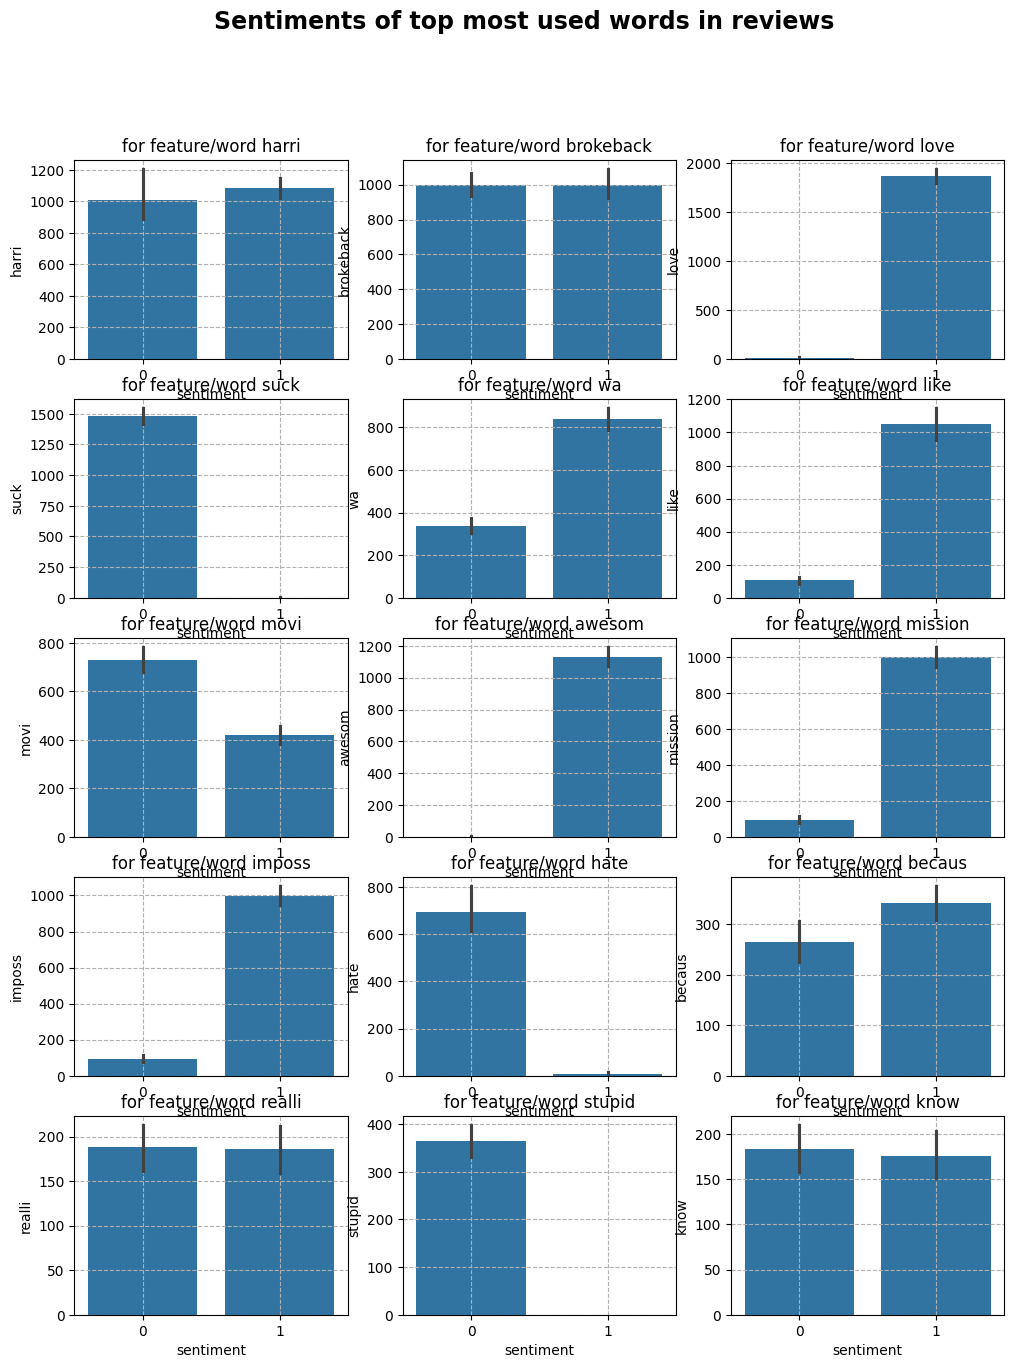

In [28]:
bar_df = feature_counts2.sort_values('counts', ascending=False)[:15]
feature_list = list(bar_df.features)

fig, ax = plt.subplots(5,3, figsize=(12,15))
for i, j in enumerate(feature_list):
    sns.barplot(x='sentiment', y=j ,data=trn_ds_df, estimator=sum, ax=ax[i//3, i%3])
    ax[i//3, i%3].grid(visible=True, linestyle='--')
    ax[i//3, i%3].set_title(f'for feature/word {j}')

plt.suptitle("Sentiments of top most used words in reviews", fontsize=17, fontweight='bold')
plt.show()

(-0.5, 1599.5, 599.5, -0.5)

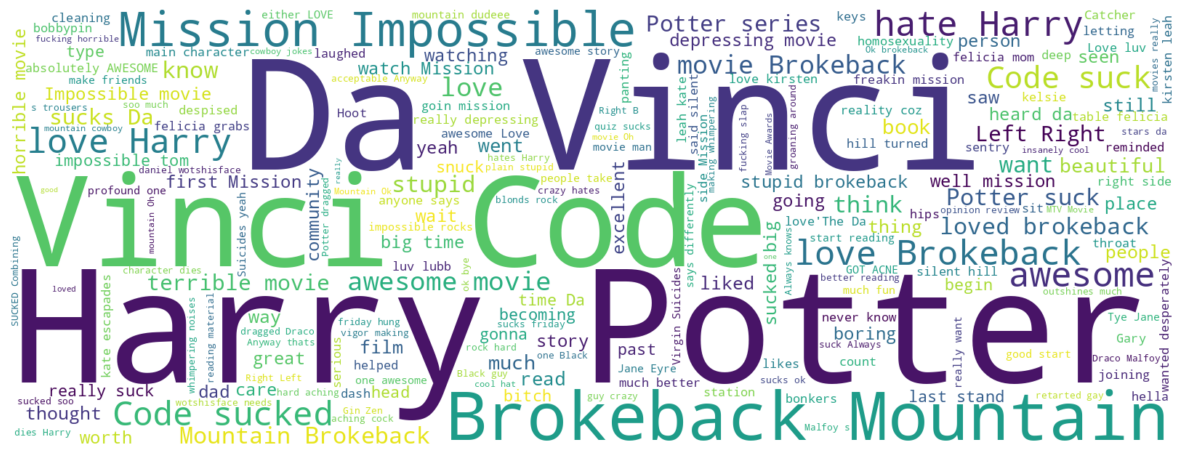

In [29]:
plt.figure(figsize=(15,15))
wc = WordCloud(max_words=1000,
               min_font_size=10,
               height=600,
               width=1600,
               background_color='white',
               stopwords=STOPWORDS).generate(' '.join(train_ds.text))

plt.imshow(wc, interpolation= "bilinear")
plt.axis('off')

In [30]:
train_X,test_X,train_y,test_y = train_test_split(train_ds_features2, train_ds.sentiment,
                                                   test_size = 0.3, random_state=42)
print(train_X.shape)
print(test_X.shape)

# naive-bayes classifier
nb_clf = BernoulliNB()
nb_clf.fit(train_X.toarray(), train_y)
prediction = nb_clf.predict(test_X.toarray())

(4842, 1000)
(2076, 1000)


In [31]:
classificationreport = classification_report(test_y, prediction)
print(classificationreport)

              precision    recall  f1-score   support

           0       0.98      0.97      0.98       873
           1       0.98      0.99      0.98      1203

    accuracy                           0.98      2076
   macro avg       0.98      0.98      0.98      2076
weighted avg       0.98      0.98      0.98      2076



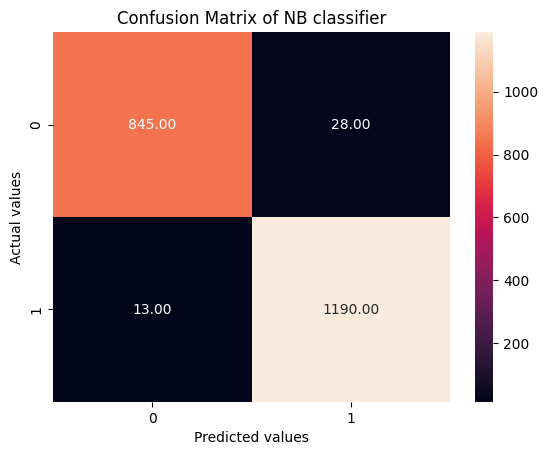

In [32]:
cm = confusion_matrix(test_y, prediction)
sns.heatmap(cm, annot=True, fmt=".2f")
plt.title("Confusion Matrix of NB classifier")
plt.ylabel("Actual values")
plt.xlabel("Predicted values")
plt.show()

In [33]:
trn_X,tst_X,trn_y,tst_y = train_test_split(train_ds.text, train_ds.sentiment,
                                                   test_size = 0.3, random_state=42)

# transform dataset into cleaned vectorizors
tfidf_vectorizer = TfidfVectorizer(analyzer= stemming_words,
                                   max_features = 1000)
feature_train = tfidf_vectorizer.fit_transform(trn_X)
feature_test = tfidf_vectorizer.transform(tst_X)

In [34]:
models = [DecisionTreeClassifier(),
          RandomForestClassifier(),
          LogisticRegression(max_iter=1000),
          KNeighborsClassifier(),
          BernoulliNB()]

In [35]:
logistic_reg = LogisticRegression(max_iter=1000)
logistic_reg.fit(feature_train, trn_y)
prediction_log = logistic_reg.predict(feature_test)
clf_report = classification_report(tst_y, prediction_log)
print(clf_report)

              precision    recall  f1-score   support

           0       0.99      0.98      0.98       873
           1       0.98      0.99      0.99      1203

    accuracy                           0.99      2076
   macro avg       0.99      0.98      0.99      2076
weighted avg       0.99      0.99      0.99      2076



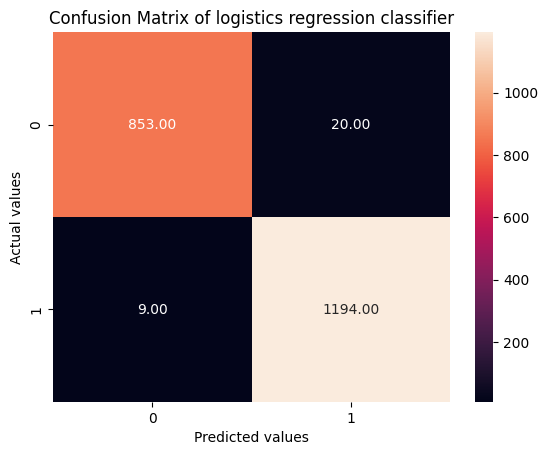

In [36]:
cm_log = confusion_matrix(tst_y, prediction_log)
sns.heatmap(cm_log, annot=True, fmt=".2f")
plt.title("Confusion Matrix of logistics regression classifier")
plt.ylabel("Actual values")
plt.xlabel("Predicted values")
plt.show()

In [37]:
def get_stemmed_tokens(doc):
    all_tokens = [word for word in nltk.word_tokenize(doc)]
    clean_tokens = []
    for each_token in all_tokens:
        if re.search('[a-zA-Z]', each_token):
            clean_tokens.append(each_token)
    # stem the words
    stemmed_tokens = [stemmer.stem(t) for t in clean_tokens]
    return stemmed_tokens

In [38]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [39]:
tfidf_vector = TfidfVectorizer(max_features=1000,
                               stop_words='english',
                               tokenizer = get_stemmed_tokens,
                               ngram_range=(1,2))

feature_trn = tfidf_vector.fit_transform(trn_X)
feature_tst = tfidf_vector.transform(tst_X)
# build Naive-bayes model
NB_model = BernoulliNB()
NB_model.fit(feature_trn, trn_y)
preds = NB_model.predict(feature_tst)
clf_report = classification_report(tst_y, preds)
print(clf_report)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'formerli', 'forti', 'ha', 'henc', 'hereaft', 'herebi', 'hi', 'howev', 'hundr', 'inde', 'latterli', 'mani', 'meanwhil', 'moreov', 'mostli', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'seriou', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'themselv', 'thenc', 'thereaft', 'therebi', '

              precision    recall  f1-score   support

           0       1.00      0.95      0.97       873
           1       0.96      1.00      0.98      1203

    accuracy                           0.98      2076
   macro avg       0.98      0.97      0.98      2076
weighted avg       0.98      0.98      0.98      2076

